In [28]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cityData = pd.read_csv(city_data_to_load)
rideData = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combinedData = pd.merge(rideData, cityData, how="left", on=['city','city'])

# Display the data table for preview
combinedData.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [29]:
combinedData_df= combinedData[["city", "date", "fare", "ride_id", "driver_count", "type"]]
combinedData_df.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [9]:
# Obtain the x and y coordinates for each of the three city types
combinedData["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
#calculate value for cities with Urban group 
urbanCities= combinedData[combinedData["type"]=="Urban"].groupby("city")

#calculate rides per city and average fare per city 
urbanRidesPerCity = urbanCities["city"].count()
urbanAvgFare = urbanCities["fare"].mean()
urbanDriverCount= urbanCities["driver_count"].mean()

#create data frame for 
urbanCities_df= pd.DataFrame({"Total Number of Rides": urbanRidesPerCity, 
                              "Average Fare Per City":  urbanAvgFare, 
                               "Driver Count":urbanDriverCount})
urbanCities_df.head()

,Total Number of Rides,Average Fare Per City,Driver Count
city,,,
Amandaburgh,18,24.641667,12
Barajasview,22,25.332273,26
Carriemouth,27,28.314444,52
Christopherfurt,27,24.501852,41
Deanville,19,25.842632,49


In [11]:
#calculate value for cities with Suburban group 
suburbanCities= combinedData[combinedData["type"]=="Suburban"].groupby("city")

#calculate rides per city and average fare per city 
suburbanRidesPerCity = suburbanCities["city"].count()
suburbanAvgFare = suburbanCities["fare"].mean()
suburbanDriverCount= suburbanCities["driver_count"].mean()

#create data frame for 
suburbanCities_df= pd.DataFrame({"Total Number of Rides": suburbanRidesPerCity, 
                              "Average Fare Per City":  suburbanAvgFare, 
                               "Driver Count":suburbanDriverCount})
suburbanCities_df.head()

,Total Number of Rides,Average Fare Per City,Driver Count
city,,,
Barronchester,16,36.422500,11
Bethanyland,18,32.956111,22
Brandonfort,19,35.437368,10
Colemanland,22,30.894545,23
Davidfurt,17,31.995882,23


In [12]:
#calculate value for cities with Rural group 
ruralCities= combinedData[combinedData["type"]=="Rural"].groupby("city")

#calculate rides per city and average fare per city 
ruralRidesPerCity = ruralCities["city"].count()
ruralAvgFare = ruralCities["fare"].mean()
ruralDriverCount= ruralCities["driver_count"].mean()

#create data frame for 
ruralCities_df= pd.DataFrame({"Total Number of Rides": ruralRidesPerCity, 
                              "Average Fare Per City":  ruralAvgFare, 
                               "Driver Count": ruralDriverCount})
ruralCities_df.head()

,Total Number of Rides,Average Fare Per City,Driver Count
city,,,
Bradshawfurt,10,40.064000,7
Garzaport,3,24.123333,7
Harringtonfort,6,33.470000,4
Jessicaport,6,36.013333,1
Lake Jamie,6,34.358333,4


## Bubble Plot of Ride Sharing Data

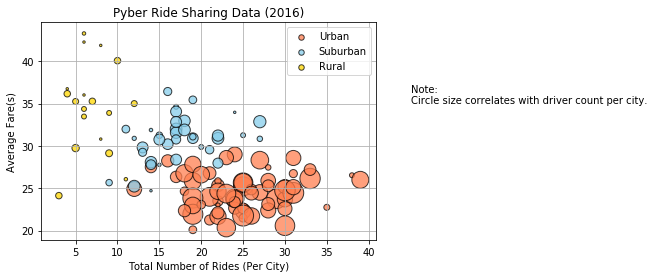

In [15]:
# Build the scatter plots for each city types
plt.scatter(urbanCities_df["Total Number of Rides"], urbanCities_df["Average Fare Per City"], s= urbanCities_df["Driver Count"]*6, label="Urban", 
                        color= "coral", edgecolor = "black", alpha=0.75)

plt.scatter(suburbanCities_df["Total Number of Rides"], suburbanCities_df["Average Fare Per City"], s= suburbanCities_df["Driver Count"]*6, label="Suburban", 
            color= "skyblue", edgecolor = "black", alpha=0.75)

plt.scatter(ruralCities_df["Total Number of Rides"], ruralCities_df["Average Fare Per City"], s= ruralCities_df["Driver Count"]*6, label="Rural", 
            color= "gold", edgecolor = "black", alpha=0.75)


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare(s)")


# Create a legend
lgnd= plt.legend()
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.grid()

# Incorporate a text label regarding circle size
plt.text(45,35, "Note:\nCircle size correlates with driver count per city.")
         
# Save Figure

plt.savefig("PyberRideSharingData.png")

plt.show()

In [16]:
# Show plot
plt.show()

## Total Fares by City Type

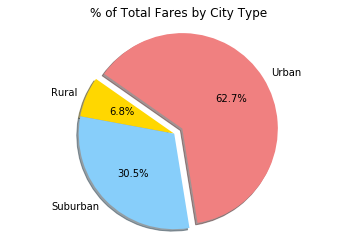

In [46]:
# Calculate Type Percents
totalData = combinedData.groupby("type")
totalFareAmount = combinedData["fare"].sum()

totalFareType = totalData["fare"].sum()
percentFare = round((totalFareType/totalFareAmount *100), 2)

faresSummary = pd.DataFrame({"Total Fares": totalFareType, "Fare Percent": percentFare})
faresSummary

# Build Pie Chart

labels = ["Rural", "Suburban", "Urban"]
percents = faresSummary["Fare Percent"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(percents, labels=labels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle= 145) 
plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("Total_Fares_by_City_Type")

In [47]:
# Show Figure
plt.show()

## Total Rides by City Type

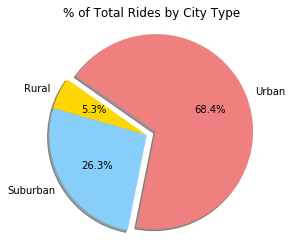

<Figure size 432x288 with 0 Axes>

In [69]:
# Calculate Ride Percents
totalRides= combinedData_df["ride_id"].count()
ridesPerType= totalData["ride_id"].count()
percentRides= ridesPerType/totalRides

ridesSummary=pd.DataFrame({"Total Rides": ridesPerType, "Ride Percents": percentRides})

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
percents= ridesSummary["Ride Percents"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(percents, labels=labels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=145) 
plt.title("% of Total Rides by City Type")
plt.axis("scaled")


# Save Figure
plt.savefig("Total_Rides_by_City_Type.png")

In [70]:
# Show Figure
plt.show()

## Total Drivers by City Type

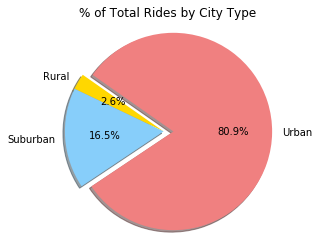

In [71]:
# Calculate Driver Percents
suburbanDrivers= suburbanCities_df["Driver Count"].sum()
urbanDrivers= urbanCities_df["Driver Count"].sum()
ruralDrivers= ruralCities_df["Driver Count"].sum()

totalDrivers= suburbanDrivers + urbanDrivers + ruralDrivers

percentRuralDrivers = ruralDrivers/totalDrivers
percentUrbanDrivers = urbanDrivers/totalDrivers
percentSuburbanDrivers = suburbanDrivers/totalDrivers


# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
percents= [percentRuralDrivers, percentSuburbanDrivers, percentUrbanDrivers]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(percents, labels=labels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=145) 
plt.title("% of Total Rides by City Type")
plt.axis("scaled")


# # Save Figure
plt.savefig("Total_Rides_by_City_Type.png")


In [ ]:
# Show Figure
plt.show()